<a href="https://colab.research.google.com/github/sajad95/Heat/blob/main/precipitation_forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Forecasting rainfall is of significant importance for various reasons:**

Agriculture and Crop Management: Accurate rainfall forecasts are crucial for agricultural planning and crop management. Farmers can optimize irrigation schedules, plan planting and harvesting activities, and make informed decisions about fertilization and pest control based on rainfall forecasts. It helps maximize crop yield, reduce water usage, and minimize crop losses due to droughts or excessive rainfall [[1]](#ref1).

Water Resource Management: Rainfall forecasting plays a critical role in managing water resources. It helps water authorities and policymakers make informed decisions about water allocation, reservoir management, and flood control. By predicting rainfall patterns, authorities can optimize water supply, ensure reservoirs are filled adequately, and take appropriate measures to mitigate the risks of floods and droughts [[2]](#ref2).

Flood Prediction and Disaster Preparedness: Timely and accurate rainfall forecasts are essential for predicting and preparing for potential flood events. By monitoring rainfall patterns, river levels, and soil moisture, authorities can issue flood warnings, evacuate vulnerable areas, and mobilize resources to minimize the impact of floods and protect lives and properties[[3]](#ref3).

Urban Planning and Infrastructure: Rainfall forecasts are essential for urban planning and infrastructure development. They help in designing efficient drainage systems, stormwater management, and flood-resistant infrastructure. By considering rainfall projections, cities can minimize the risks of urban flooding, erosion, and infrastructure damage[[4]](#ref4).

Hydroelectric Power Generation: Rainfall forecasts are crucial for hydroelectric power generation. Reservoir operators need accurate rainfall predictions to manage water inflows and optimize power generation. It helps in maintaining a balance between water availability, power generation capacity, and environmental sustainability [[5]](#ref5).

Climate Research and Modeling: Rainfall forecasting contributes to climate research and modeling. By analyzing long-term rainfall data and trends, scientists can study climate patterns, assess the impact of climate change, and develop models to predict future climate scenarios. It aids in understanding the Earth's climate system and formulating strategies to mitigate climate-related risks [[6]](#ref6).

Overall, accurate rainfall forecasting has wide-ranging implications for various sectors, including agriculture, water management, disaster preparedness, infrastructure planning, and climate research. It enables better decision-making, resource optimization, and risk reduction, ultimately leading to improved sustainability, resilience, and well-being.

# Table of Contents

- [<font size="5">1. Exploration and Cleaning</font>](#ref2)


- [<font size="5">2. Visualizations and Time Series Analysis</font>](#ref30)





- [<font size="5">3. precipitation  Forecasting</font>](#ref18)

    - [<font size="4">3.1. DL </font>](#ref19)
    - [<font size="4">3.1. CNN </font>](#ref19)
    - [<font size="4">3.1. ARIMA </font>](#ref19)




- [<font size="5">4. Discussion</font>](#ref10)
- [<font size="5">5. References</font>](#ref10)

# importing Libraries

In [1]:
!pip install pandas --quiet
import csv
import pandas as pd
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from dataclasses import dataclass
from google.colab import drive

In [2]:
drive.mount('/content/saj')

Mounted at /content/saj


In [3]:
df = pd.read_csv('/content/saj/MyDrive/TOrentocitycenterraindata/TorontoRain.csv')

# <a id='ref2'>1. Exploration and Cleaning</a>
Hourly climate observations are derived from the data source HLY01. These are stations that produce hourly meteorological observations, taken each hour of the day for the hours 00h-23h, for both daily (temperature, precipitation) and non-daily elements (station pressure, relative humidity, visibility).

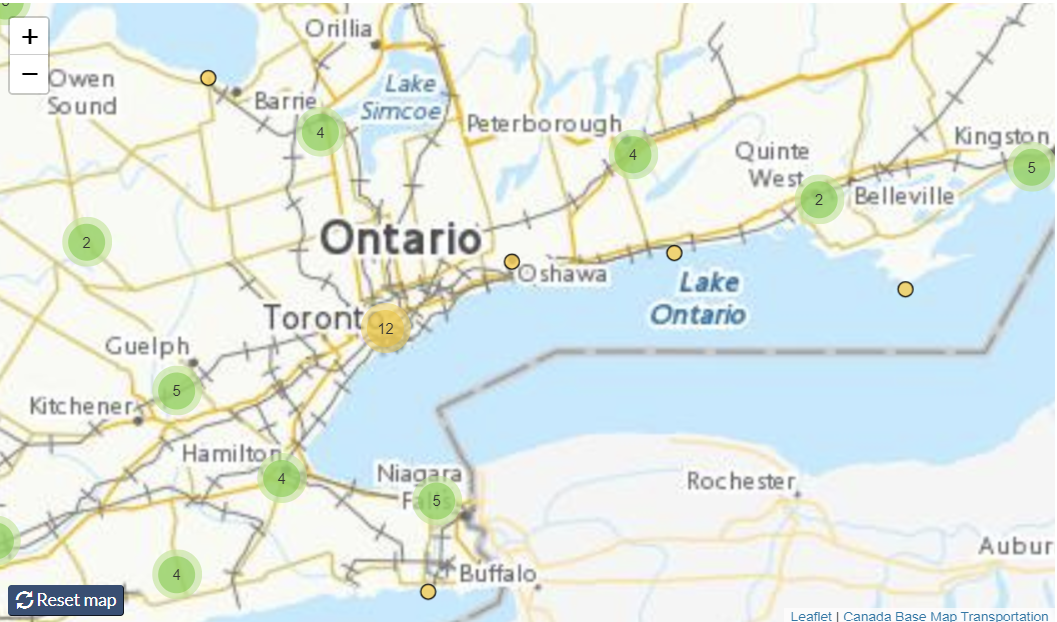

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from dataclasses import dataclass
from google.colab import drive
import os
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing, impute

In [5]:
# Reading the data
import pandas as pd

# List of CSV file names
file_names = ['/content/saj/MyDrive/TOrentocitycenterraindata/1.csv', '/content/saj/MyDrive/TOrentocitycenterraindata/2.csv',
              '/content/saj/MyDrive/TOrentocitycenterraindata/3.csv', '/content/saj/MyDrive/TOrentocitycenterraindata/4.csv',
              '/content/saj/MyDrive/TOrentocitycenterraindata/5.csv',
              '/content/saj/MyDrive/TOrentocitycenterraindata/6.csv', '/content/saj/MyDrive/TOrentocitycenterraindata/7.csv',
              '/content/saj/MyDrive/TOrentocitycenterraindata/8.csv', '/content/saj/MyDrive/TOrentocitycenterraindata/9.csv',
              '/content/saj/MyDrive/TOrentocitycenterraindata/10.csv', '/content/saj/MyDrive/TOrentocitycenterraindata/11.csv',
              '/content/saj/MyDrive/TOrentocitycenterraindata/12.csv'
              ]

# Empty list to store dataframes
dfs = []

# Specify columns to import
columns_to_import = ['LOCAL_DATE','TEMP','RELATIVE_HUMIDITY', 'PRECIP_AMOUNT','LOCAL_YEAR','LOCAL_MONTH','LOCAL_DAY','WIND_DIRECTION','WIND_SPEED']

# Read each CSV file and append selected columns to the list
for file_name in file_names:
    df = pd.read_csv(file_name, usecols=columns_to_import)
    dfs.append(df)

# Concatenate the dataframes vertically
combined_df = pd.concat(dfs, axis=0)

# Print the combined dataframe
print(combined_df)

               LOCAL_DATE  LOCAL_YEAR  LOCAL_MONTH  LOCAL_DAY  TEMP  \
0     2009-12-10 17:00:00        2009           12         10  -5.0   
1     2009-12-10 18:00:00        2009           12         10  -6.0   
2     2009-12-10 19:00:00        2009           12         10  -7.0   
3     2009-12-10 20:00:00        2009           12         10  -7.0   
4     2009-12-10 21:00:00        2009           12         10  -7.0   
...                   ...         ...          ...        ...   ...   
8149  2023-06-13 19:00:00        2023            6         13  13.8   
8150  2023-06-13 20:00:00        2023            6         13  13.6   
8151  2023-06-13 21:00:00        2023            6         13  13.8   
8152  2023-06-13 22:00:00        2023            6         13  13.6   
8153  2023-06-13 23:00:00        2023            6         13  13.6   

      PRECIP_AMOUNT  RELATIVE_HUMIDITY  WIND_DIRECTION  WIND_SPEED  
0               NaN               71.0            25.0        55.0  
1        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LOCAL_DATE         8154 non-null   object 
 1   LOCAL_YEAR         8154 non-null   int64  
 2   LOCAL_MONTH        8154 non-null   int64  
 3   LOCAL_DAY          8154 non-null   int64  
 4   TEMP               8038 non-null   float64
 5   PRECIP_AMOUNT      8154 non-null   float64
 6   RELATIVE_HUMIDITY  8030 non-null   float64
 7   WIND_DIRECTION     7659 non-null   float64
 8   WIND_SPEED         7936 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 573.5+ KB


In [7]:
df.head(4)

,LOCAL_DATE,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,TEMP,PRECIP_AMOUNT,RELATIVE_HUMIDITY,WIND_DIRECTION,WIND_SPEED
0,2022-07-07 15:00:00,2022,7,7,23.4,0.0,NaN,13.0,8.0
1,2022-07-07 16:00:00,2022,7,7,NaN,0.0,NaN,13.0,9.0
2,2022-07-07 17:00:00,2022,7,7,NaN,0.0,NaN,13.0,15.0
3,2022-07-07 18:00:00,2022,7,7,NaN,0.0,NaN,9.0,9.0


In [8]:
df.describe()

,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,TEMP,PRECIP_AMOUNT,RELATIVE_HUMIDITY,WIND_DIRECTION,WIND_SPEED
count,8154.000000,8154.000000,8154.000000,8038.000000,8154.000000,8030.000000,7659.000000,7936.000000
mean,2022.482463,6.521462,15.633554,9.141366,0.087589,72.713200,19.833921,18.856351
std,0.499723,3.554912,8.774699,9.011160,0.556022,15.141367,10.396681,10.614920
min,2022.000000,1.000000,1.000000,-20.000000,0.000000,19.000000,0.000000,0.000000
25%,2022.000000,3.000000,8.000000,2.000000,0.000000,63.000000,8.000000,11.000000
50%,2022.000000,7.000000,15.000000,7.700000,0.000000,73.000000,23.000000,17.000000
75%,2023.000000,10.000000,23.000000,16.800000,0.000000,84.000000,29.000000,26.000000
max,2023.000000,12.000000,31.000000,34.000000,18.200000,100.000000,36.000000,68.000000


# <a id='ref30'>2. Visualizations and Time Series Analysis</a>

The `msno.matrix(df)` function is part of the `missingno` library in Python, which provides a convenient way to visualize missing data in a DataFrame. The `msno.matrix()` function creates a matrix plot that displays the distribution of missing values across the columns of the DataFrame.

Here's what the function does in more detail:

1. It takes a DataFrame (`df`) as input.
2. It visualizes missing values as a matrix plot, where each column of the DataFrame is represented by a vertical bar.
3. The white vertical bars indicate the presence of missing values, while the black bars represent non-missing values.
4. The y-axis represents the rows of the DataFrame, and the x-axis corresponds to the columns.
5. The function provides a visual summary of the missingness patterns in the DataFrame, making it easier to identify the columns or rows with missing data and assess the extent of missingness.

By using `msno.matrix(df)`, you can quickly identify the missing data patterns and determine which columns or rows have missing values, allowing you to make informed decisions on how to handle missing data in your analysis or data preprocessing steps.

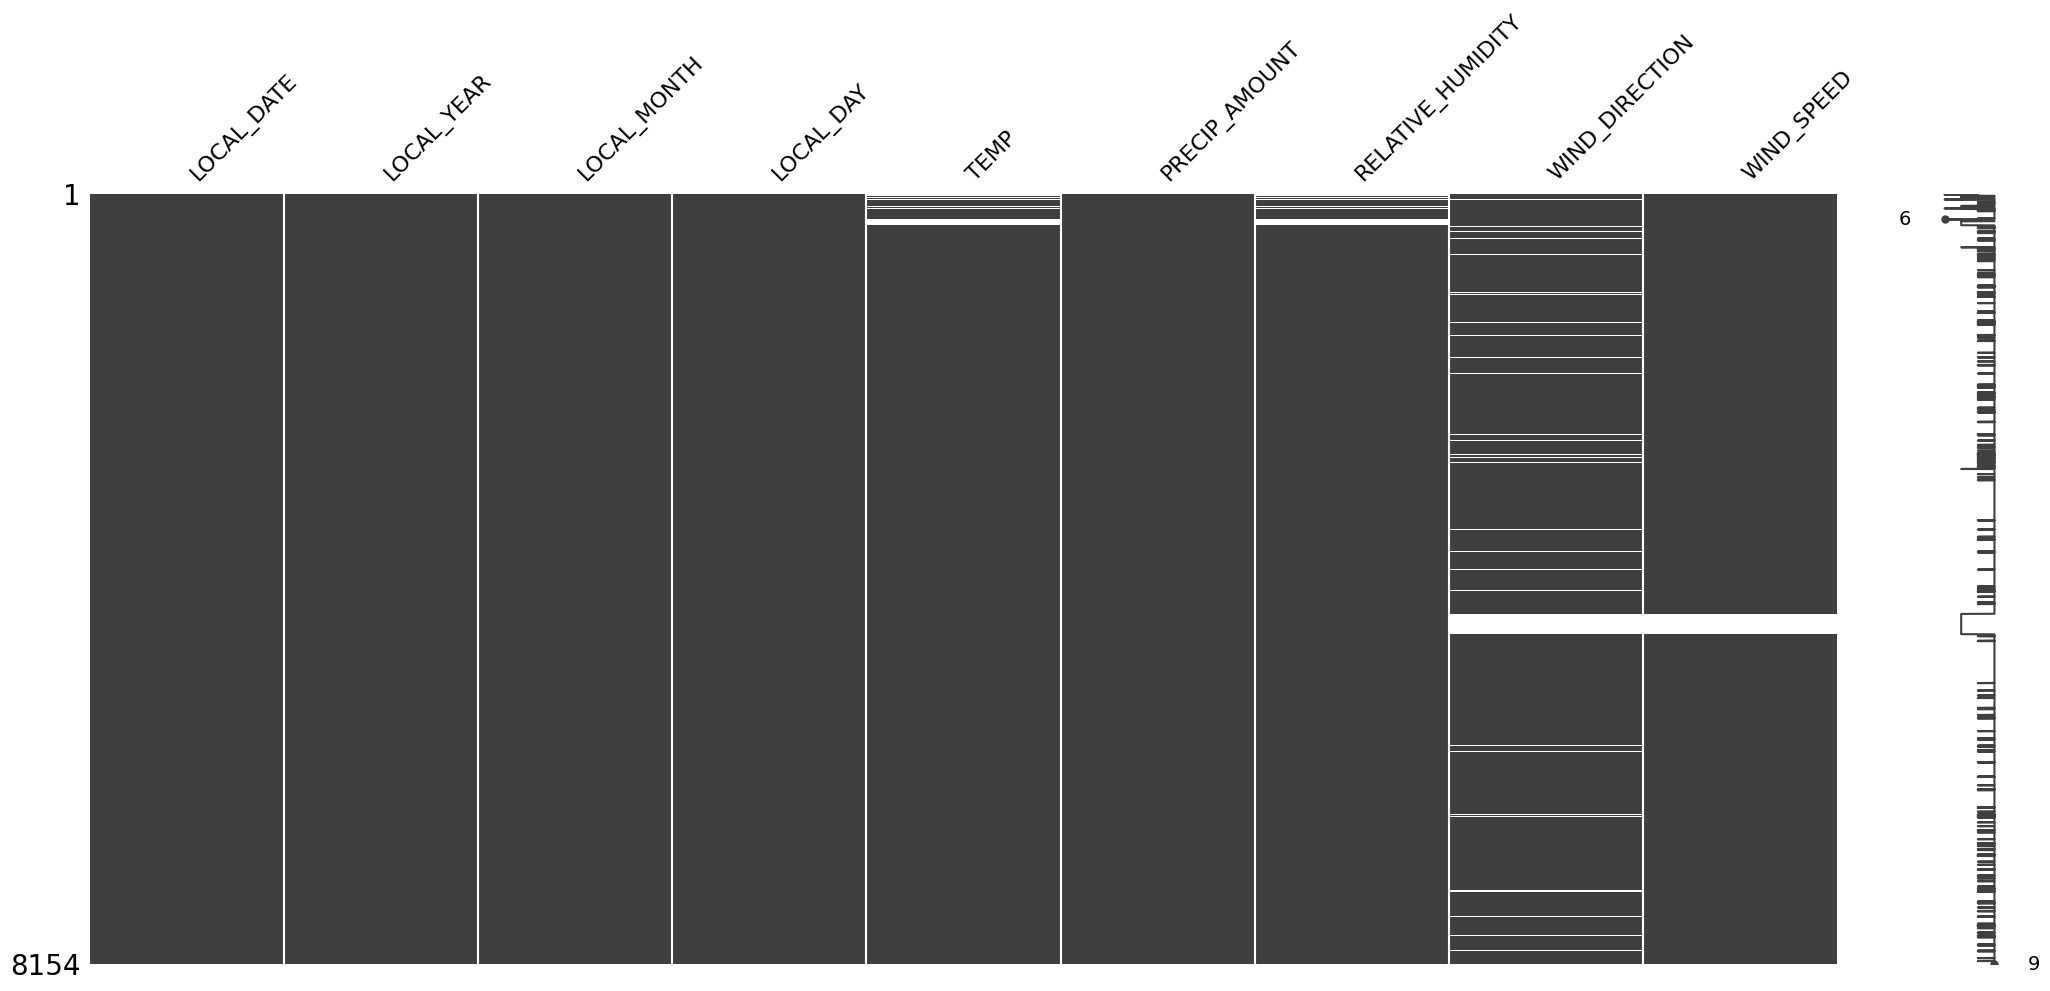

In [9]:
# showing the Missing values
import missingno as msno
msno.matrix(df)
plt.show()

generates a heatmap plot that visualizes the correlation between the columns of the DataFrame df. It helps to identify patterns and relationships between variables, making it easier to understand the data's structure and potential dependencies.

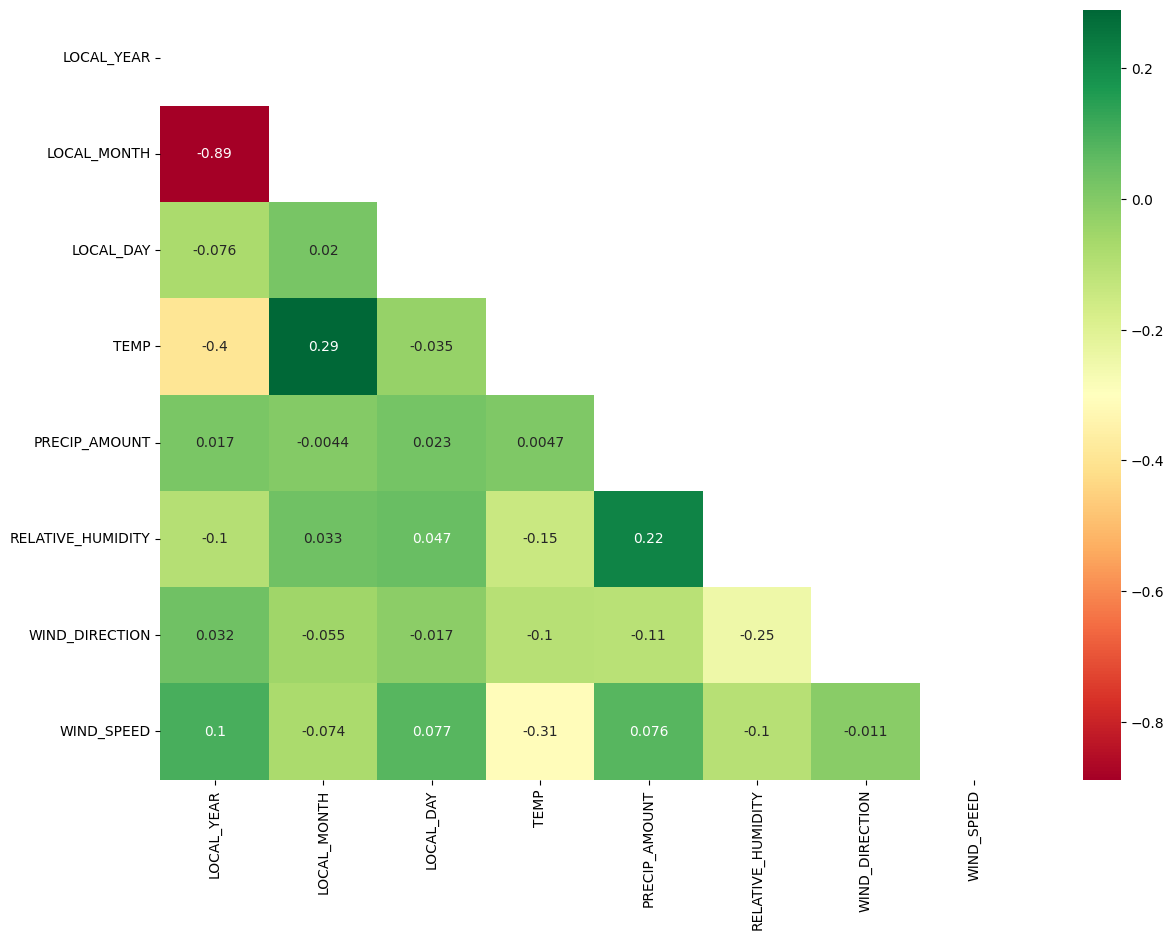

In [10]:
## Feature Interactions:
plt.figure(figsize = (14,10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap="RdYlGn",mask = mask,annot=True)
plt.show()

In [11]:
print(df.apply(lambda x: x.nunique()))
df.describe().T.style.background_gradient(
    vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))

LOCAL_DATE           8154
LOCAL_YEAR              2
LOCAL_MONTH            12
LOCAL_DAY              31
TEMP                  438
PRECIP_AMOUNT          39
RELATIVE_HUMIDITY      81
WIND_DIRECTION         37
WIND_SPEED             37
dtype: int64


,count,mean,std,min,25%,50%,75%,max
LOCAL_YEAR,8154.000000,2022.482463,0.499723,2022.000000,2022.000000,2022.000000,2023.000000,2023.000000
LOCAL_MONTH,8154.000000,6.521462,3.554912,1.000000,3.000000,7.000000,10.000000,12.000000
LOCAL_DAY,8154.000000,15.633554,8.774699,1.000000,8.000000,15.000000,23.000000,31.000000
TEMP,8038.000000,9.141366,9.011160,-20.000000,2.000000,7.700000,16.800000,34.000000
PRECIP_AMOUNT,8154.000000,0.087589,0.556022,0.000000,0.000000,0.000000,0.000000,18.200000
RELATIVE_HUMIDITY,8030.000000,72.713200,15.141367,19.000000,63.000000,73.000000,84.000000,100.000000
WIND_DIRECTION,7659.000000,19.833921,10.396681,0.000000,8.000000,23.000000,29.000000,36.000000
WIND_SPEED,7936.000000,18.856351,10.614920,0.000000,11.000000,17.000000,26.000000,68.000000


In [12]:
def annotate_plot(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0,8),
                       textcoords='offset points')

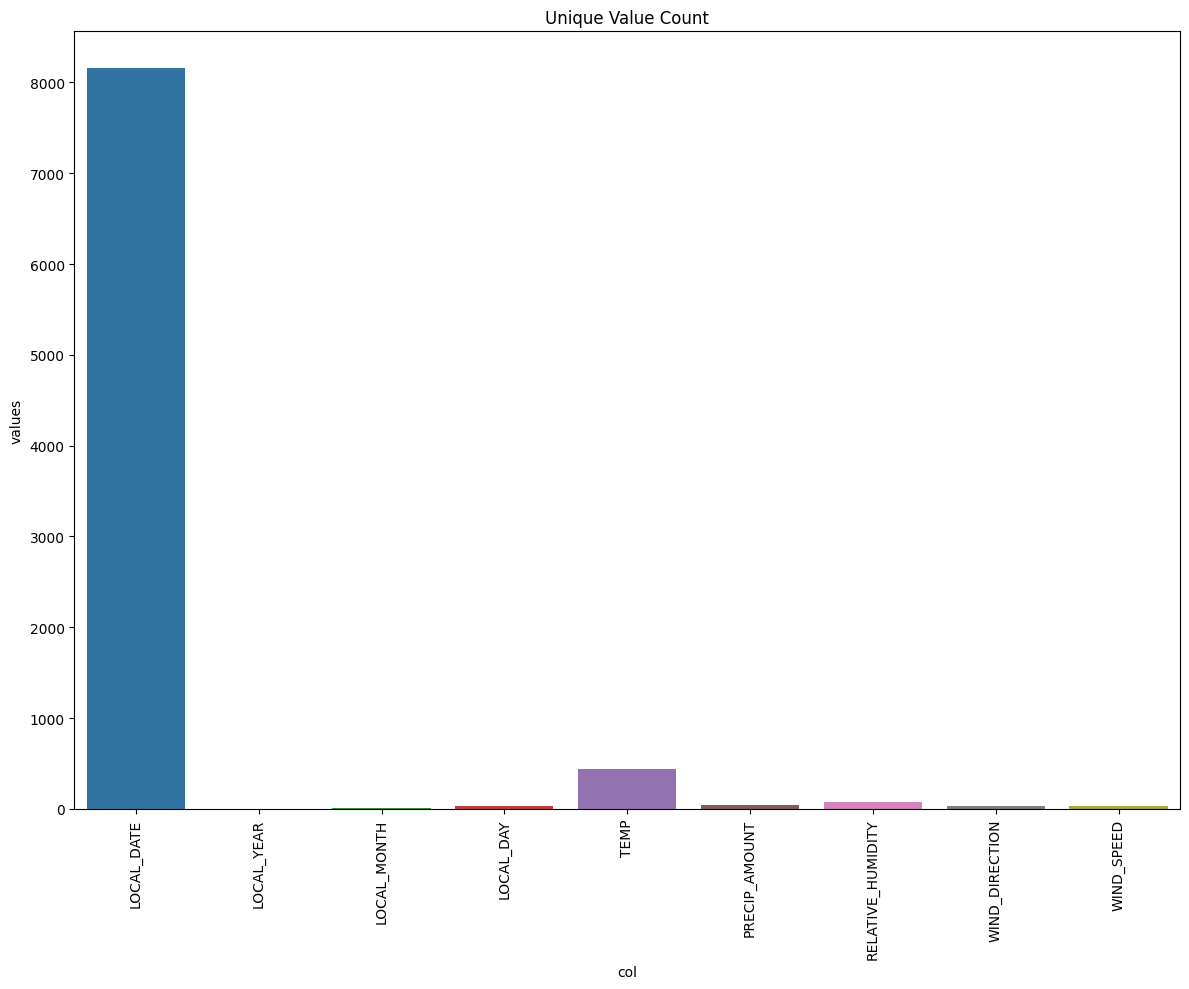

In [13]:
plt.figure(figsize=(12,10))
unique_df = pd.DataFrame(df.apply(lambda x: x.nunique()))
unique_df = unique_df.reset_index()
unique_df.columns = ["col","values"]
g = sns.barplot(x="col",data = unique_df, y= "values")
#annotate_plot(g)
plt.xticks(rotation=90)
plt.title("Unique Value Count")
plt.tight_layout()
plt.show()

In [14]:
df

,LOCAL_DATE,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,TEMP,PRECIP_AMOUNT,RELATIVE_HUMIDITY,WIND_DIRECTION,WIND_SPEED
0,2022-07-07 15:00:00,2022,7,7,23.4,0.0,NaN,13.0,8.0
1,2022-07-07 16:00:00,2022,7,7,NaN,0.0,NaN,13.0,9.0
2,2022-07-07 17:00:00,2022,7,7,NaN,0.0,NaN,13.0,15.0
3,2022-07-07 18:00:00,2022,7,7,NaN,0.0,NaN,9.0,9.0
4,2022-07-07 19:00:00,2022,7,7,NaN,0.0,NaN,7.0,5.0
...,...,...,...,...,...,...,...,...,...
8149,2023-06-13 19:00:00,2023,6,13,13.8,0.5,90.0,6.0,15.0
8150,2023-06-13 20:00:00,2023,6,13,13.6,0.0,89.0,8.0,11.0
8151,2023-06-13 21:00:00,2023,6,13,13.8,0.0,84.0,14.0,15.0
8152,2023-06-13 22:00:00,2023,6,13,13.6,0.0,91.0,8.0,11.0


In [15]:
col = ['LOCAL_DATE', 'LOCAL_YEAR','LOCAL_MONTH','LOCAL_DAY']
df_an = df.drop(col, axis=1)

In [16]:
index = df_an.columns.get_loc('PRECIP_AMOUNT')
print(index)  # Output: 1

1


In [17]:
df_an = df_an[['TEMP', 'RELATIVE_HUMIDITY','WIND_SPEED', 'PRECIP_AMOUNT']]

In [18]:
df_an

,TEMP,RELATIVE_HUMIDITY,WIND_SPEED,PRECIP_AMOUNT
0,23.4,NaN,8.0,0.0
1,NaN,NaN,9.0,0.0
2,NaN,NaN,15.0,0.0
3,NaN,NaN,9.0,0.0
4,NaN,NaN,5.0,0.0
...,...,...,...,...
8149,13.8,90.0,15.0,0.5
8150,13.6,89.0,11.0,0.0
8151,13.8,84.0,15.0,0.0
8152,13.6,91.0,11.0,0.0


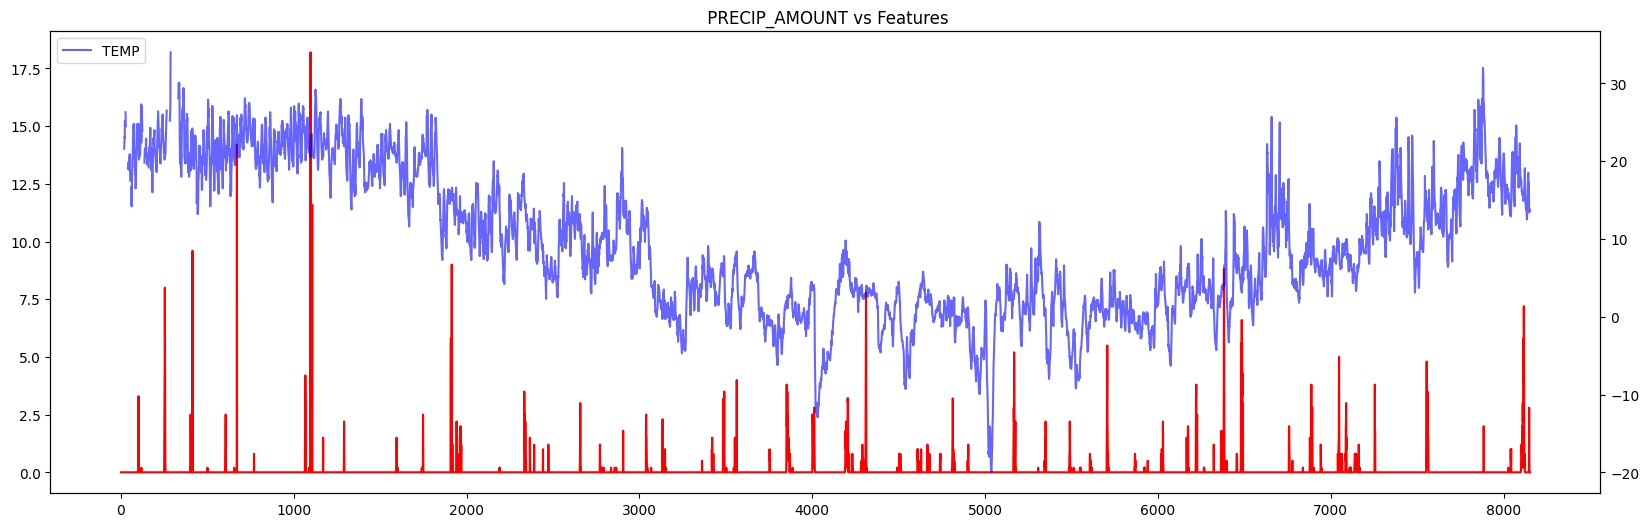

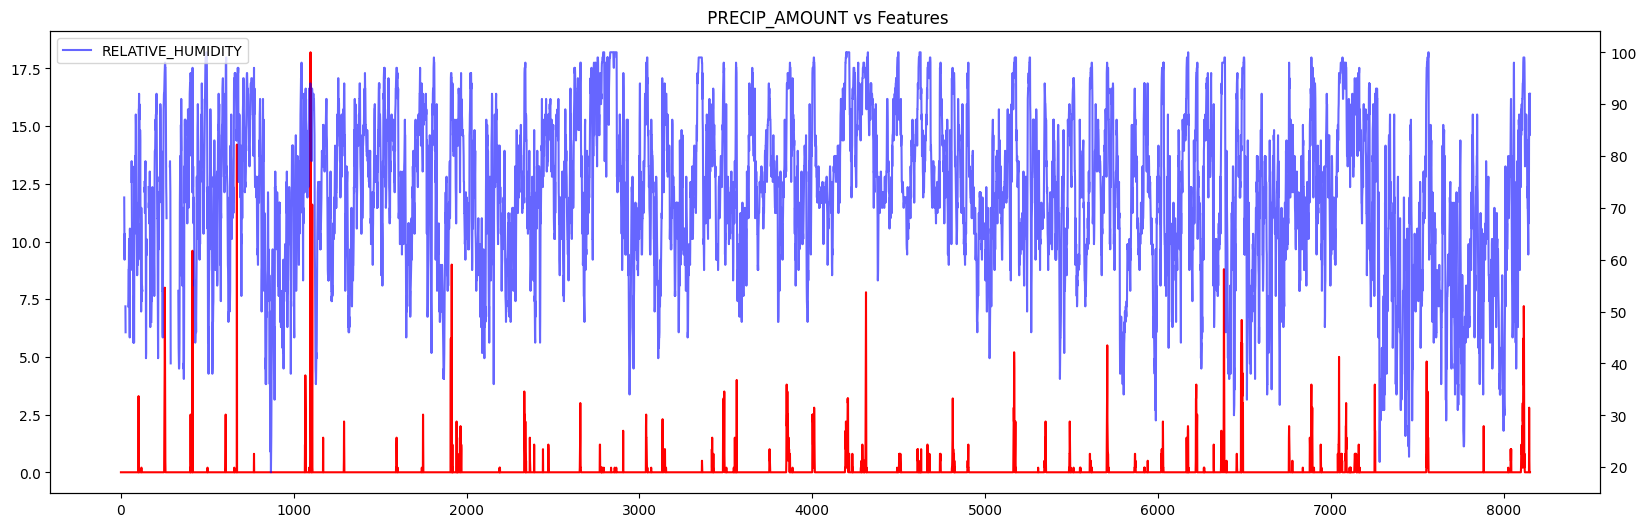

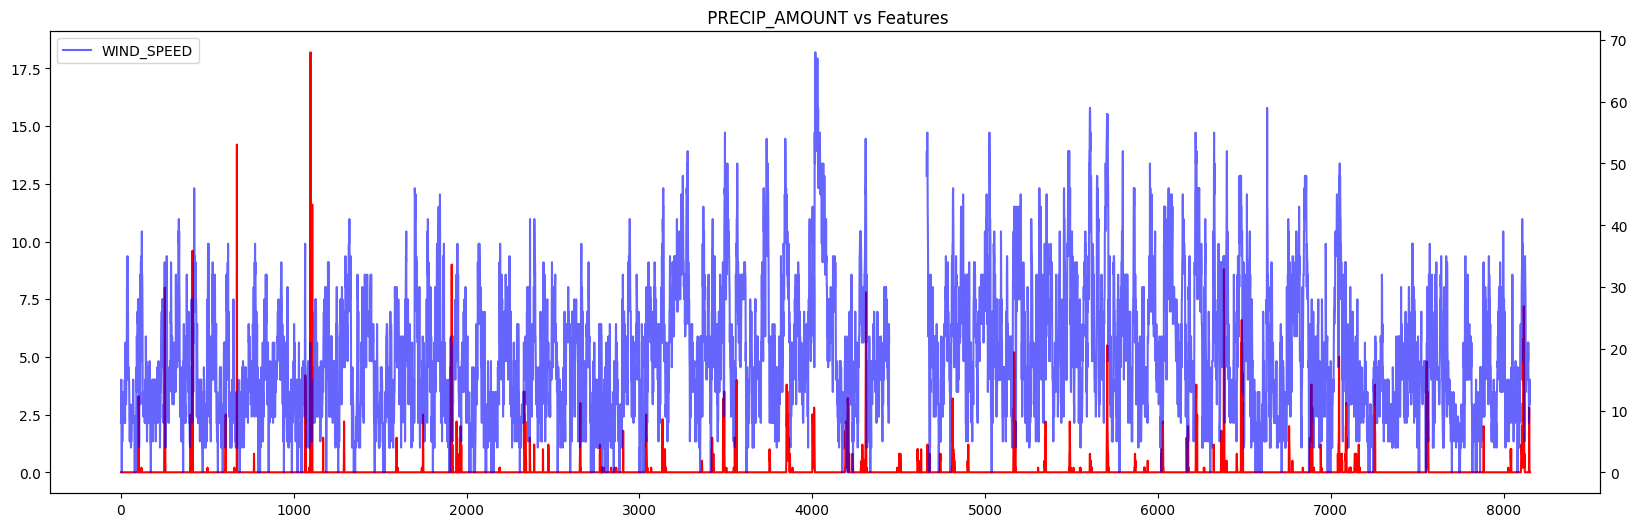

In [ ]:
# showing the precipitation vs other features
# y1 is heating
plt.ion()
y1 = df_an.iloc[:,3]
A = list(df_an)
for i in range(3):
  y2 = df_an.iloc[:,i]
  x_ax = range (len(df_an['TEMP']))
  fig, ax1 = plt.subplots(figsize=(20,6))
  #Adding another y axis
  ax2 = ax1.twinx()
  ax1.plot(x_ax, y1, 'r-')
  ax2.plot(x_ax, y2, 'b-', alpha = 0.6 , label = A [i])
  plt.title(" PRECIP_AMOUNT vs Features")

  plt.legend(loc='upper left')#Upper right ,
  plt.show()


In [ ]:
# Remove rows with NaN values in all columns
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7539 entries, 19 to 8153
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LOCAL_DATE         7539 non-null   object 
 1   LOCAL_YEAR         7539 non-null   int64  
 2   LOCAL_MONTH        7539 non-null   int64  
 3   LOCAL_DAY          7539 non-null   int64  
 4   TEMP               7539 non-null   float64
 5   PRECIP_AMOUNT      7539 non-null   float64
 6   RELATIVE_HUMIDITY  7539 non-null   float64
 7   WIND_DIRECTION     7539 non-null   float64
 8   WIND_SPEED         7539 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 589.0+ KB


In [ ]:
df.to_csv('TorontoRain.csv', index=False)

In [ ]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df_arima = df [['LOCAL_DATE','PRECIP_AMOUNT']]

In [ ]:
col = ['LOCAL_DATE','LOCAL_YEAR']
df_dropped = df.drop(col, axis=1)

In [ ]:
df_dropped

,LOCAL_MONTH,LOCAL_DAY,TEMP,PRECIP_AMOUNT,RELATIVE_HUMIDITY,WIND_DIRECTION,WIND_SPEED
19,7,8,21.6,0.0,72.0,18.0,13.0
20,7,8,22.2,0.0,64.0,17.0,11.0
21,7,8,23.1,0.0,60.0,11.0,8.0
22,7,8,23.0,0.0,65.0,6.0,15.0
23,7,8,25.2,0.0,61.0,6.0,13.0
...,...,...,...,...,...,...,...
8149,6,13,13.8,0.5,90.0,6.0,15.0
8150,6,13,13.6,0.0,89.0,8.0,11.0
8151,6,13,13.8,0.0,84.0,14.0,15.0
8152,6,13,13.6,0.0,91.0,8.0,11.0


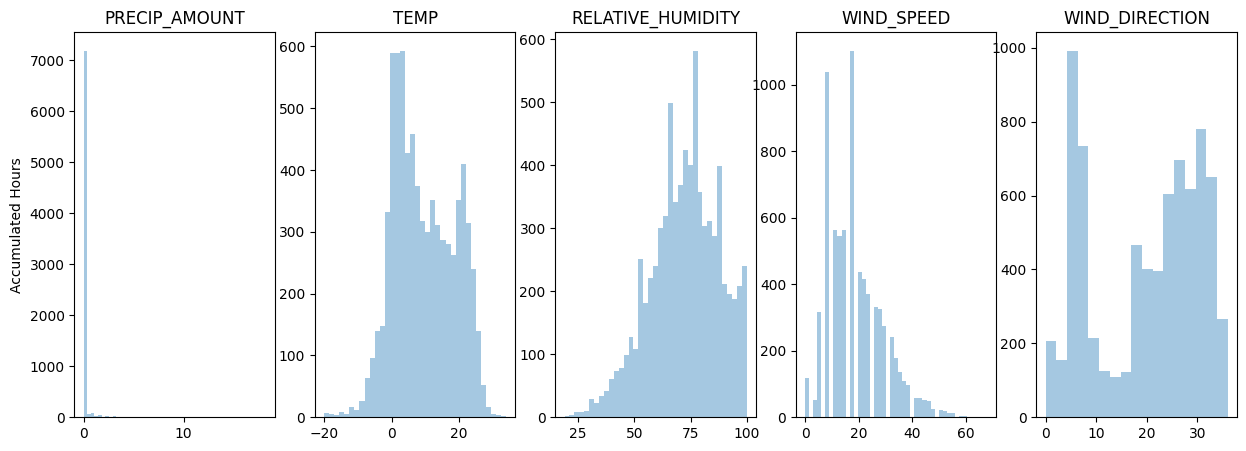

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the column names
columns_to_visualize = ['PRECIP_AMOUNT', 'TEMP', 'RELATIVE_HUMIDITY', 'WIND_SPEED','WIND_DIRECTION']   # Add more column names as needed

# Calculate the number of subplots based on the number of columns
num_subplots = len(columns_to_visualize)

# Create subplots dynamically
fig, axs = plt.subplots(1, num_subplots, figsize=(15, 5))

# Iterate over subplots and column names
for i, (ax, col) in enumerate(zip(axs, columns_to_visualize)):
    # Histogram plot
    sns.distplot(df_dropped[col], ax=ax, kde=False, hist=True)
    # Set axis labels
    ax.set_title(col)
    ax.set_xlabel('')

    # Add y-axis title to the first subplot only
    if i == 0:
        ax.set_ylabel('Accumulated Hours')

plt.show()


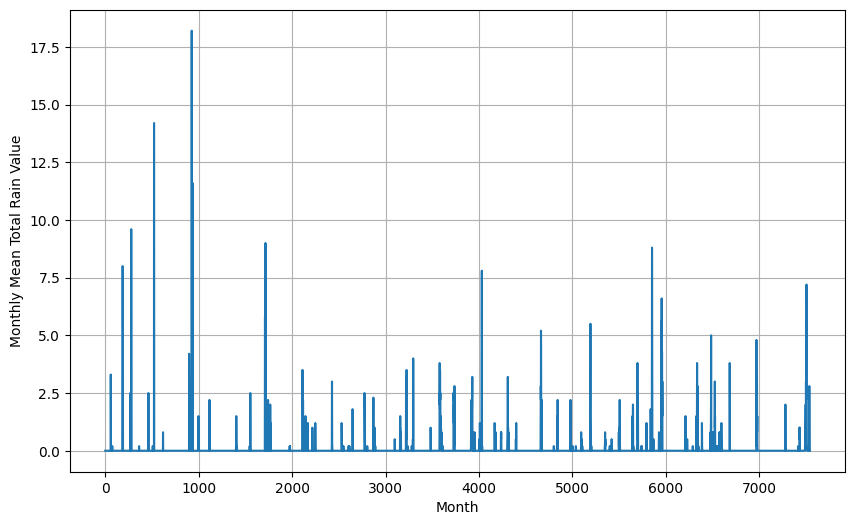

In [ ]:
# Initialize lists
LOCAL_HOUR = []
PRECIP_AMOUNT = []

# Open CSV file
with open('/content/saj/MyDrive/TOrentocitycenterraindata/TorontoRain.csv') as csvfile:

  # Initialize reader
  reader = csv.reader(csvfile, delimiter=',')

  # Skip the first line
  next(reader)

  # Append row and sunspot number to lists
  for row in reader:
    LOCAL_HOUR.append(int(row[0]))
    PRECIP_AMOUNT.append(float(row[6]))

# Convert lists to numpy arrays
time = np.array(LOCAL_HOUR)
series = np.array(PRECIP_AMOUNT)

# Preview the data
plot_series(time, series, xlabel='Month', ylabel='Monthly Mean Total Rain Value')

# <a id='ref18'>3. precipitation  Forecasting</a>

In [ ]:
# Define the split time
split_time = 6000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [ ]:
# Parameters
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


## <a id='ref19'>3.1. Deep learning</a>

Deep learning is a subfield of machine learning that focuses on building and training artificial neural networks with multiple layers. It is inspired by the structure and function of the human brain, specifically the interconnected network of neurons.

In deep learning, neural networks are composed of multiple layers of artificial neurons called nodes or units. Each layer receives input from the previous layer, processes it using a set of mathematical operations, and passes the output to the next layer. The layers in a neural network are typically organized into an input layer, one or more hidden layers, and an output layer.

Deep learning algorithms are designed to automatically learn and extract hierarchical representations of data from raw inputs. This ability to learn from data makes deep learning models highly effective for a wide range of tasks, including image and speech recognition, natural language processing, recommendation systems, and many more.

One of the key advantages of deep learning is its ability to handle high-dimensional and complex data, such as images, audio, and text. Deep neural networks can automatically learn relevant features and patterns from the data, enabling them to make accurate predictions or classifications.

Training a deep learning model involves feeding it with a large labeled dataset and optimizing the model's internal parameters through a process called backpropagation. Backpropagation computes the gradients of the model's parameters with respect to a defined loss function, and updates the parameters using optimization algorithms like stochastic gradient descent. This iterative process allows the model to gradually improve its performance by adjusting the weights and biases of the network.

Deep learning has gained significant attention and popularity in recent years due to its impressive performance on various complex tasks. It has been empowered by the availability of large-scale datasets, advances in computing power (e.g., GPUs), and the development of powerful deep learning frameworks such as TensorFlow, Keras, and PyTorch.

It's worth noting that while deep learning has achieved remarkable success, it also requires a substantial amount of labeled training data, computational resources, and careful model architecture design to avoid overfitting or other challenges. Additionally, interpretability and understanding of the inner workings of deep learning models can be challenging due to their complexity.

In [ ]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[window_size, 1]),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1, activation='relu'),
])

# Print the model summary
model.summary()

# Get initial weights
init_weights = model.get_weights()

# Set the learning rate
learning_rate = 1e-6

# Set the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 30)                0         
                                                                 
 dense_21 (Dense)            (None, 128)               3968      
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30,849
Trainable params: 30,849
Non-trai

In [ ]:
# Train the model
history = model.fit(train_set,epochs=1000)

Epoch 1/600
187/187 [==============================] - 2s 6ms/step - loss: 0.0651 - mae: 0.0938
Epoch 2/600
187/187 [==============================] - 1s 4ms/step - loss: 0.0651 - mae: 0.0940
Epoch 3/600
187/187 [==============================] - 1s 4ms/step - loss: 0.0650 - mae: 0.0942
Epoch 4/600
187/187 [==============================] - 1s 4ms/step - loss: 0.0650 - mae: 0.0945
Epoch 5/600
187/187 [==============================] - 1s 5ms/step - loss: 0.0650 - mae: 0.0947
Epoch 6/600
187/187 [==============================] - 1s 7ms/step - loss: 0.0649 - mae: 0.0949
Epoch 7/600
187/187 [==============================] - 1s 4ms/step - loss: 0.0649 - mae: 0.0952
Epoch 8/600
187/187 [==============================] - 1s 4ms/step - loss: 0.0648 - mae: 0.0954
Epoch 9/600
187/187 [==============================] - 1s 6ms/step - loss: 0.0648 - mae: 0.0956
Epoch 10/600
187/187 [==============================] - 1s 7ms/step - loss: 0.0648 - mae: 0.0959
Epoch 11/600
187/187 [=================

What is loss : L(y_true, y_pred) = 0.5 * q^2 * (y_true - y_pred)^2     if |y_true - y_pred| <= q
L(y_true, y_pred) = q * (|y_true - y_pred| - 0.5 * q)   otherwise


In the equations above:

L(y_true, y_pred) represents the Huber loss between the true values (y_true) and the predicted values (y_pred).
q is a hyperparameter called the "delta" that defines the threshold for switching from quadratic to linear loss. It determines the point at which the loss function transitions from behaving like the MSE loss to behaving like the MAE loss.
(y_true - y_pred) represents the difference between the true values and the predicted values.
When the absolute difference between the true and predicted values is less than or equal to the delta (|y_true - y_pred| <= q), the Huber loss function computes the squared error multiplied by 0.5 times the square of delta. This part behaves like the MSE loss and penalizes larger errors more than the MAE loss.

When the absolute difference exceeds the delta (|y_true - y_pred| > q), the loss function computes the absolute difference multiplied by the delta and subtracts 0.5 times the square of delta. This part behaves like the MAE loss and penalizes smaller errors linearly.

By using the Huber loss function, the model can handle outliers in the data effectively. It provides a compromise between the robustness of MAE to outliers and the sensitivity of MSE to smaller errors.








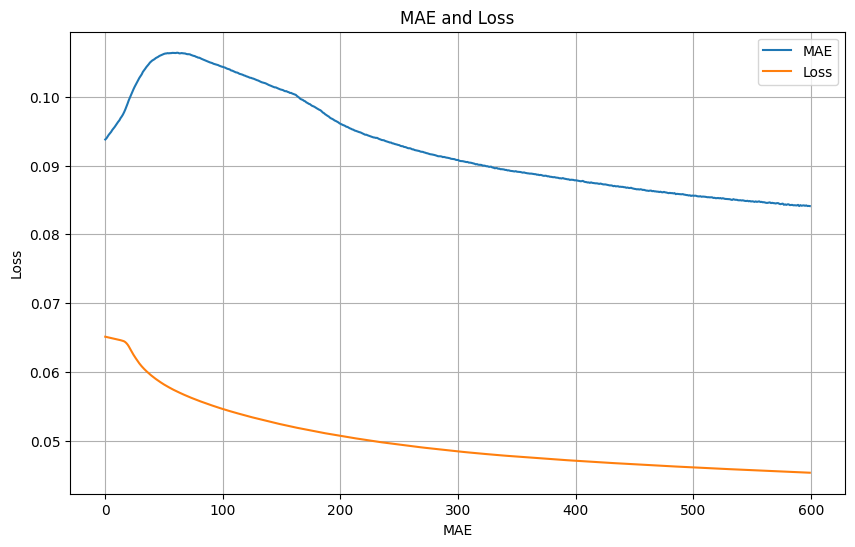

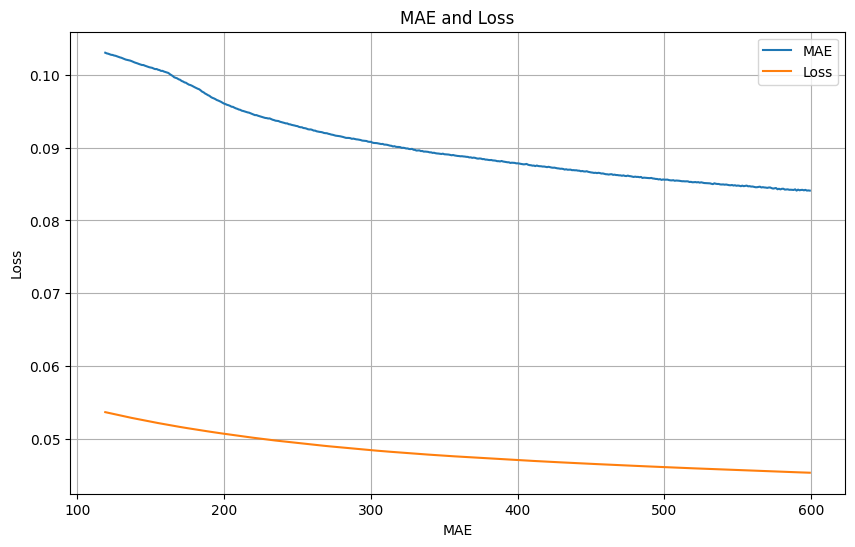

In [ ]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='Epoch',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

49/49 [==============================] - 0s 4ms/step


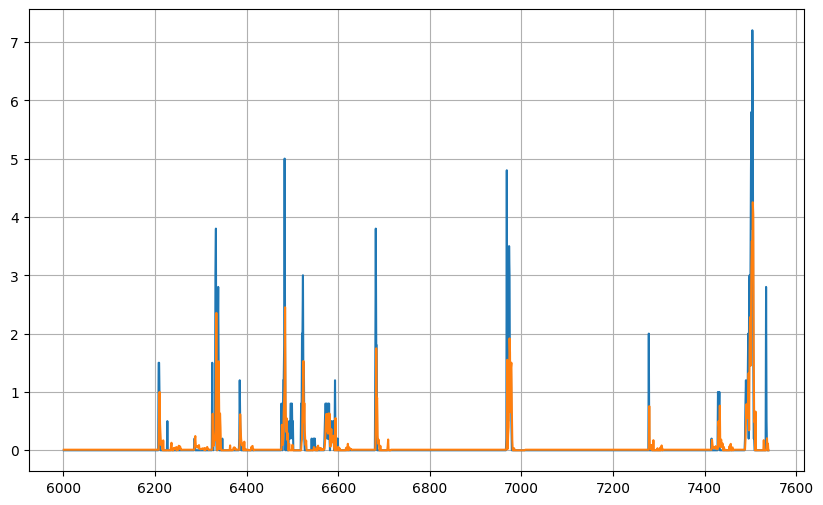

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

0.08613636


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming you have the validation data in x_valid and the predictions in results

# R-squared (R2)
r2 = r2_score(x_valid, results)
print("R-squared:", r2)


# Mean Absolute Error (MAE)
mae = mean_absolute_error(x_valid, results)
print("Mean Absolute Error:", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(x_valid, results)
print("Mean Squared Error:", mse)


R-squared: 0.5108700230960685
Mean Absolute Error: 0.0861363580832869
Mean Squared Error: 0.12666365773946553


## <a id='ref19'>3.2. Convolutional Neural Network (CNN)</a>



Convolutional Neural Networks (CNNs) are a specific type of deep learning neural network architecture that is primarily used for analyzing visual data such as images or videos. CNNs are designed to automatically and adaptively learn hierarchical representations of data directly from raw input.

The key components of a CNN are:

1. Convolutional Layers: Convolutional layers are the core building blocks of CNNs. They consist of filters (also called kernels) that slide over the input data to perform a convolution operation. This operation involves element-wise multiplication of the filter with the input, followed by summing the results to produce a feature map. Convolutional layers extract various low-level and high-level features from the input data.

2. Pooling Layers: Pooling layers are used to reduce the spatial dimensions (width and height) of the feature maps generated by the convolutional layers. Common pooling operations include max pooling and average pooling, which downsample the input by selecting the maximum or average value within a pooling window. Pooling helps to reduce the computational complexity and extract the most important features.

3. Activation Functions: Activation functions introduce non-linearities into the network, enabling the CNN to learn complex patterns and relationships in the data. Common activation functions used in CNNs include ReLU (Rectified Linear Unit), sigmoid, and tanh.

4. Fully Connected Layers: Fully connected layers are traditional neural network layers where all nodes from the previous layer are connected to every node in the current layer. These layers are typically placed at the end of the CNN architecture to perform classification or regression tasks based on the extracted features.

The typical workflow of training a CNN involves the following steps:

1. Data Preprocessing: Prepare and preprocess the input data, including resizing, normalization, and data augmentation techniques to increase the size and diversity of the training set.

2. Model Architecture: Define the architecture of the CNN by stacking convolutional, pooling, and fully connected layers according to the problem at hand. The number and size of layers may vary depending on the complexity of the task.

3. Forward Propagation: Feed the input data through the layers of the CNN in a forward pass. Convolutional layers extract features, pooling layers reduce dimensionality, and fully connected layers generate predictions.

4. Loss Function: Define a loss function that quantifies the discrepancy between the predicted output and the ground truth labels. Common loss functions include categorical cross-entropy for classification tasks and mean squared error for regression tasks.

5. Backpropagation and Optimization: Use backpropagation to calculate the gradients of the loss with respect to the model parameters. Update the parameters using optimization algorithms like stochastic gradient descent (SGD) or its variants. This process iteratively adjusts the model's weights to minimize the loss function.

6. Evaluation: Assess the performance of the trained CNN on a separate validation set or test set. Metrics such as accuracy, precision, recall, and F1 score can be used to evaluate the model's performance.

CNNs have shown remarkable success in various computer vision tasks, including image classification, object detection, image segmentation, and more. They can automatically learn and extract complex features from visual data, making them highly effective for analyzing and understanding images and videos.

In [ ]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=[window_size, 1]),
  tf.keras.layers.MaxPooling1D(pool_size=2),
  tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPooling1D(pool_size=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
model.summary()

# Get initial weights
init_weights = model.get_weights()

# Set the learning rate
learning_rate = 1e-7

# Set the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 28, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 14, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 12, 128)           24704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 768)               0         
                                                                 
 dense_28 (Dense)            (None, 64)               

In [ ]:
# Train the model
history = model.fit(train_set,epochs=400)

Epoch 1/400
187/187 [==============================] - 2s 7ms/step - loss: 19.4234 - mae: 19.5985
Epoch 2/400
187/187 [==============================] - 1s 7ms/step - loss: 19.0726 - mae: 19.2463
Epoch 3/400
187/187 [==============================] - 1s 7ms/step - loss: 18.7219 - mae: 18.8937
Epoch 4/400
187/187 [==============================] - 1s 7ms/step - loss: 18.3812 - mae: 18.5514
Epoch 5/400
187/187 [==============================] - 2s 8ms/step - loss: 18.0434 - mae: 18.2119
Epoch 6/400
187/187 [==============================] - 1s 7ms/step - loss: 17.7091 - mae: 17.8757
Epoch 7/400
187/187 [==============================] - 1s 7ms/step - loss: 17.3772 - mae: 17.5417
Epoch 8/400
187/187 [==============================] - 1s 7ms/step - loss: 17.0484 - mae: 17.2108
Epoch 9/400
187/187 [==============================] - 2s 8ms/step - loss: 16.7237 - mae: 16.8842
Epoch 10/400
187/187 [==============================] - 2s 8ms/step - loss: 16.4032 - mae: 16.5615
Epoch 11/400
187/18

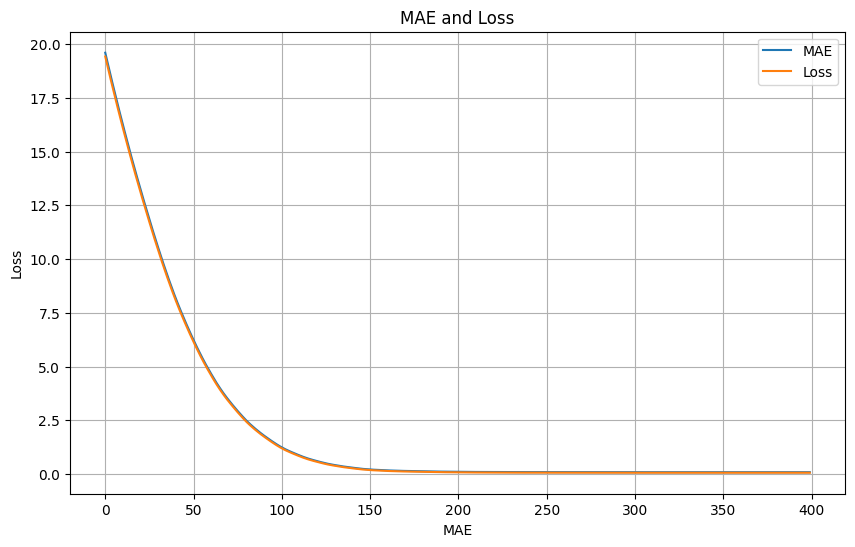

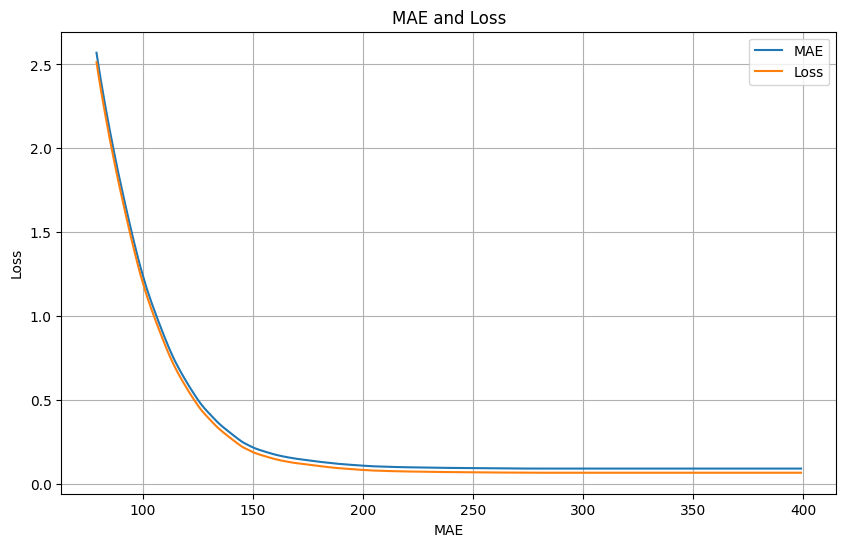

In [ ]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

49/49 [==============================] - 0s 5ms/step


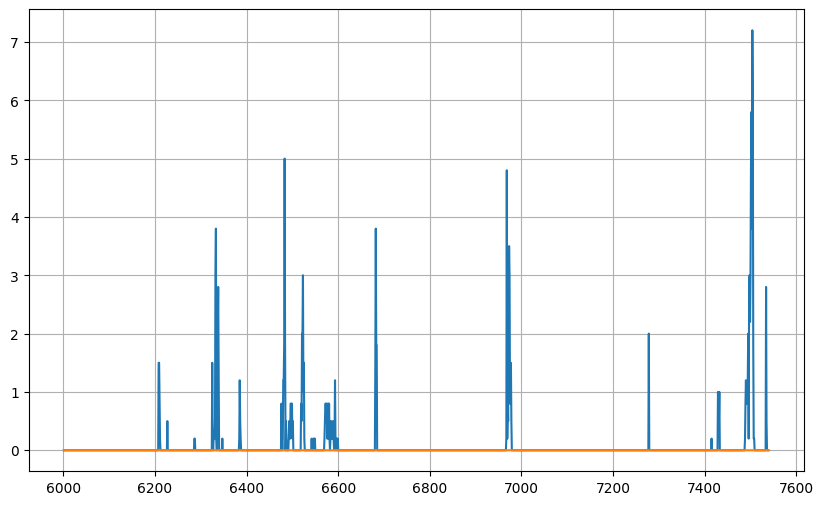

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

0.098180644


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming you have the validation data in x_valid and the predictions in results

# R-squared (R2)
r2 = r2_score(x_valid, results)
print("R-squared:", r2)


# Mean Absolute Error (MAE)
mae = mean_absolute_error(x_valid, results)
print("Mean Absolute Error:", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(x_valid, results)
print("Mean Squared Error:", mse)


R-squared: -0.037224077494237395
Mean Absolute Error: 0.09818063677712799
Mean Squared Error: 0.26859649122807017


## <a id='ref19'>3.3. ARIMA</a>



ARIMA is a popular time series forecasting model that combines autoregressive (AR), differencing (I), and moving average (MA) components. It is designed to capture and model the temporal dependencies and patterns present in time series data.

The components of ARIMA are:

1. Autoregressive (AR) Component: The autoregressive component models the relationship between an observation and a fixed number of lagged observations (i.e., previous values in the time series). It assumes that the current value of the time series is linearly dependent on its own past values.

2. Integrated (I) Component: The integrated component involves differencing the time series to make it stationary. Stationarity refers to the property of having a constant mean, variance, and autocovariance over time. Differencing removes trends and seasonality from the time series, making it easier to model.

3. Moving Average (MA) Component: The moving average component models the dependency between an observation and a residual error from a moving average model applied to lagged observations. It captures the short-term fluctuations or noise in the time series data.

The ARIMA model is typically denoted as ARIMA(p, d, q), where:
- p represents the order of the autoregressive component, indicating the number of lagged observations used for prediction.
- d represents the order of differencing applied to the time series to achieve stationarity.
- q represents the order of the moving average component, indicating the number of lagged forecast errors used in the model.

The typical workflow of using ARIMA for time series forecasting involves the following steps:

1. Data Preprocessing: Clean and preprocess the time series data, handle missing values or outliers, and ensure the data is in a suitable format.

2. Model Identification: Identify the appropriate values of p, d, and q for the ARIMA model. This can be done by analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the differenced data.

3. Model Estimation: Fit the ARIMA model to the preprocessed data using methods like maximum likelihood estimation. This involves estimating the model parameters (coefficients) that minimize the error between the predicted values and the actual values.

4. Model Validation: Evaluate the performance of the ARIMA model by comparing its predictions with the actual values on a validation dataset or through cross-validation techniques. Use evaluation metrics like mean squared error (MSE) or root mean squared error (RMSE).

5. Forecasting: Use the fitted ARIMA model to make future predictions by feeding in new data points or by generating forecasts for a specified time period. Monitor the forecast accuracy and adjust the model if necessary.

ARIMA models are widely used in various time series forecasting applications, such as predicting stock prices, weather forecasting, sales forecasting, and more. They provide a flexible and interpretable framework for capturing temporal dependencies in the data and making reliable predictions. However, it's important to note that ARIMA assumes linearity and stationary properties in the time series, and it may not perform well on data with complex non-linear patterns or long-term dependencies.

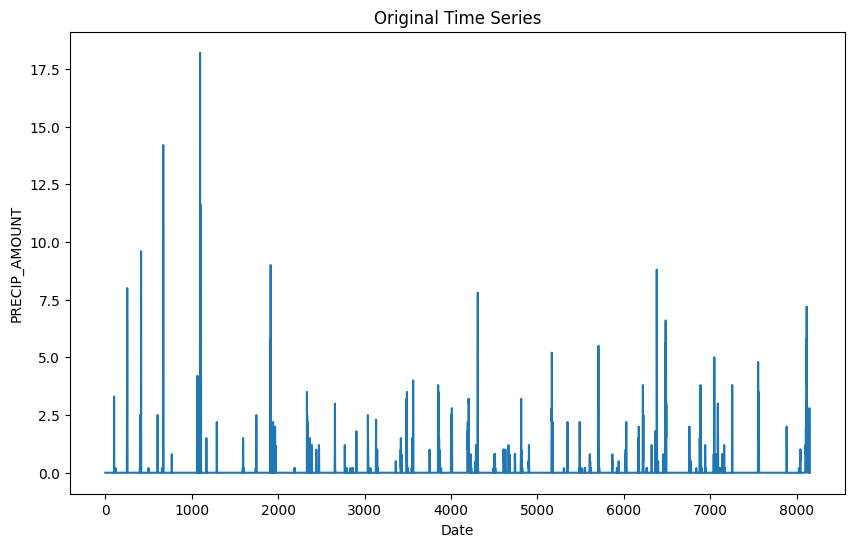

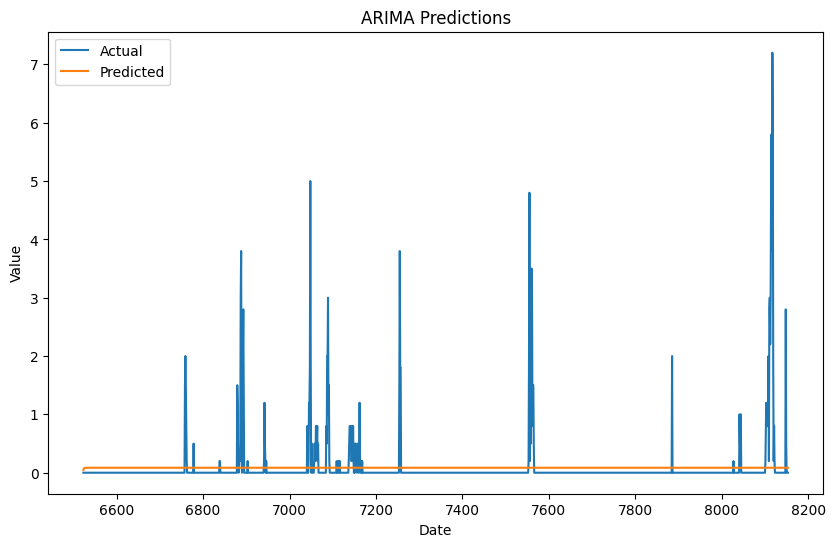

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a time series data stored in a pandas DataFrame with a 'Date' column and a 'Value' column
# Make sure to adjust the column names accordingly

# Load the data
data = df_an['PRECIP_AMOUNT']

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('PRECIP_AMOUNT')
plt.title('Original Time Series')
plt.show()

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit the ARIMA model
order = (1, 0, 0)  # (p, d, q)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Generate predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')  # Corrected line
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()


# <a id='ref18'>4. Discussion </a>

In my  comparison, DL outperformed CNN and ARIMA in terms of accuracy, suggesting that the complex patterns and relationships in the data were better captured and learned by the deep neural network architecture. DL's ability to learn hierarchical representations and its flexibility in handling diverse data types might have contributed to its superior performance. However, it's important to note that the performance of different models can vary depending on the specific dataset, problem, and model configurations. Therefore, it's crucial to carefully consider the characteristics of your data and choose the appropriate model accordingly.

# <a id='ref18'>5. Refrences </a>
 [1] Ingram, K. T., M. C. Roncoli, and P. H. Kirshen. "Opportunities and constraints for farmers of West Africa to use seasonal precipitation forecasts with Burkina Faso as a case study." Agricultural systems 74.3 (2002): 331-349.

 [2] Rayner, Steve, Denise Lach, and Helen Ingram. "Weather forecasts are for wimps: why water resource managers do not use climate forecasts." Climatic change 69.2-3 (2005): 197-227.

 [3] Braman, Lisette Martine, et al. "Climate forecasts in disaster management: Red Cross flood operations in West Africa, 2008." Disasters 37.1 (2013): 144-164.

 [4] Omitaomu, Olufemi A., Susan M. Kotikot, and Esther S. Parish. "Planning green infrastructure placement based on projected precipitation data." Journal of Environmental Management 279 (2021): 111718.

 [5] Ahmad, Shahryar Khalique, and Faisal Hossain. "Maximizing energy production from hydropower dams using short-term weather forecasts." Renewable Energy 146 (2020): 1560-1577.

 [6] Haq, Mohd Anul. "CDLSTM: A novel model for climate change forecasting." Comput. Mater. Contin 71.2 (2022): 2363-2381.